In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas

ANIME_PATH = '/Users/devon/Desktop/personai_icartoonface_dettrain'

df = pandas.read_csv(ANIME_PATH + '/icartoonface_dettrain.csv', 
    names=['file', 'x1', 'y1', 'x2', 'y2'])


In [4]:
def get_bbox(row):
    return (row['x1'], row['y1'], row['x2'] - row['x1'], row['y2'] - row['y1'])

bbox_dict = {}
for idx, row in df.iterrows():
    fname = row['file']
    if fname in bbox_dict:
        bbox_dict[fname].append(get_bbox(row))
    else:
        bbox_dict[fname] = [get_bbox(row)]

In [5]:
k = list(bbox_dict.keys())

In [6]:
arr = df.to_numpy()
W = arr[:,3] - arr[:,1]
H = arr[:,4] - arr[:,2]
print(np.sum(W > 25))
print(np.sum(H > 25))

82561
84190


In [7]:
import sys
import importlib
import datagen
importlib.reload(datagen)

import matplotlib.pyplot as plt


gen = datagen.CartoonDataGenerator(ANIME_PATH, bbox_dict, k)

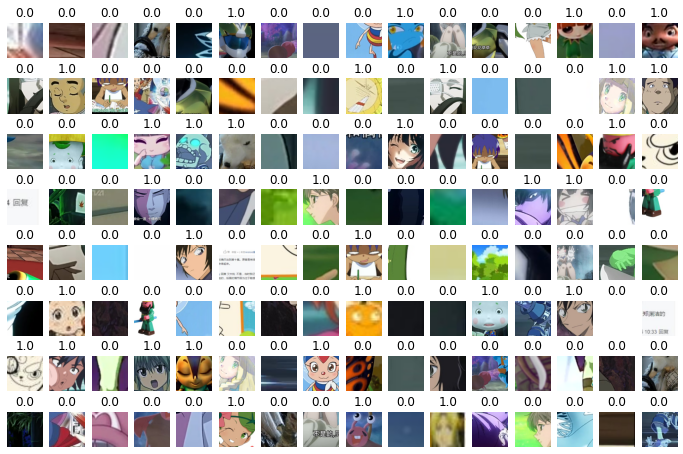

In [9]:
f, axarr = plt.subplots(8, 16, figsize=(12, 8))
axarr = axarr.ravel()

X, y = gen.__getitem__(200)
p = np.random.permutation(len(y))
X = X[p]
y = y[p]
y = y[:,np.newaxis]
for i in range(128):
    axarr[i].imshow(X[i, ...])
    axarr[i].set_title(str(y[i,0]))
    axarr[i].set_axis_off()

In [31]:
import pickle
model = keras.models.load_model('./newmodel15')
with open('./history15.pkl', 'rb') as pfile:
    history = pickle.load(pfile)

In [32]:
predX = model.predict_on_batch(X)
model.evaluate(X, y, batch_size=128)

1/1 [==============================] - 14s 14s/step - loss: 0.0721 - binary_accuracy: 0.9766


[0.07211270183324814, 0.9765625]

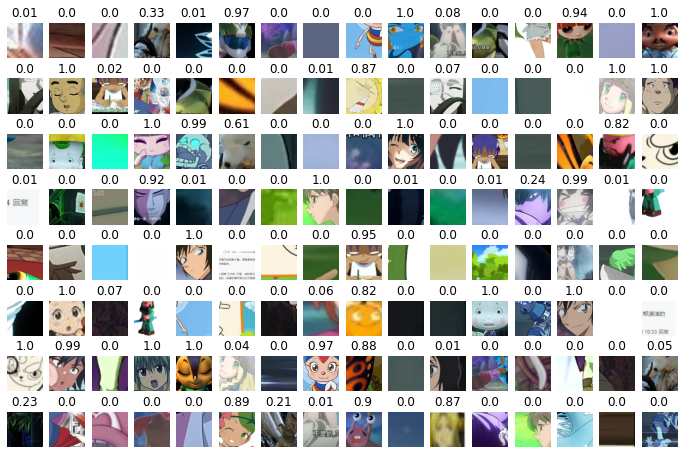

In [33]:
f, axarr = plt.subplots(8, 16, figsize=(12, 8))
axarr = axarr.ravel()

for i in range(128):
    axarr[i].imshow(X[i, ...])
    axarr[i].set_title(str(np.round(predX[i,0], decimals=2)))
    axarr[i].set_axis_off()

{'loss': [0.4792011082172394, 0.1777532994747162, 0.14853917062282562, 0.13666978478431702, 0.12799455225467682, 0.12004833668470383, 0.1164965108036995, 0.11070097982883453, 0.10658662021160126, 0.10307639092206955, 0.09852246195077896, 0.09639899432659149, 0.09310699999332428, 0.09246169775724411, 0.08858148753643036], 'binary_accuracy': [0.8763499855995178, 0.9335874915122986, 0.9439812302589417, 0.9481499791145325, 0.9510687589645386, 0.9543062448501587, 0.955637514591217, 0.957156240940094, 0.958956241607666, 0.9604812264442444, 0.9621124863624573, 0.9629687666893005, 0.9643499851226807, 0.9650124907493591, 0.9669187664985657], 'val_loss': [0.2020471841096878, 0.16053658723831177, 0.15154610574245453, 0.1467476189136505, 0.14261822402477264, 0.1375274956226349, 0.1410837471485138, 0.14206930994987488, 0.14101117849349976, 0.14231108129024506, 0.13946250081062317, 0.14264902472496033, 0.14607802033424377, 0.14978909492492676, 0.14769570529460907], 'val_binary_accuracy': [0.92550581

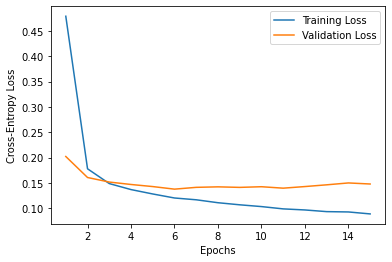

In [34]:
print(history)
epochs = len(history['loss'])
plt.plot(np.arange(1, epochs + 1), history['loss'], label='Training Loss')
plt.plot(np.arange(1, epochs + 1), history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.show()

In [43]:
def gen_heatmap(img):
    pts_x = np.arange(0, img.shape[1] - 224, 32)
    pts_y = np.arange(0, img.shape[0] - 224, 32)
    all_pts_x = np.array([pts_x for _ in pts_y]).ravel()
    all_pts_y = np.array([pts_y for _ in pts_x]).T.ravel()

    hmap = np.zeros(img.shape[:2])
    for i in range(len(all_pts_x)):
        if i % (len(all_pts_x) // 4) == 0:
            print(i, '/', len(all_pts_x))
        curr_x = all_pts_x[i]
        curr_y = all_pts_y[i]
        patch = img[curr_y : curr_y + 224, curr_x : curr_x + 224, :]
        val = model.predict(patch[np.newaxis, ...])
        if val > 0.95:
            hmap[curr_y : curr_y + 224, curr_x : curr_x + 224] += val
    return hmap

(480, 848, 3)
0 / 160
40 / 160
80 / 160
120 / 160


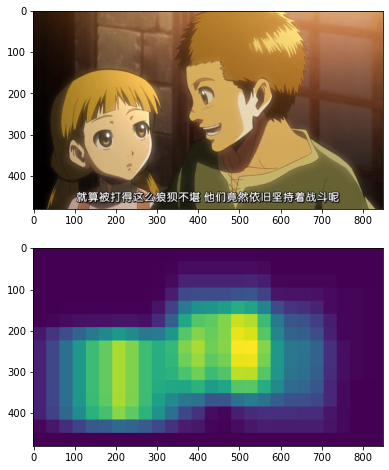

In [36]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[4321])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

6943
(480, 800, 3)
0 / 144
36 / 144
72 / 144
108 / 144


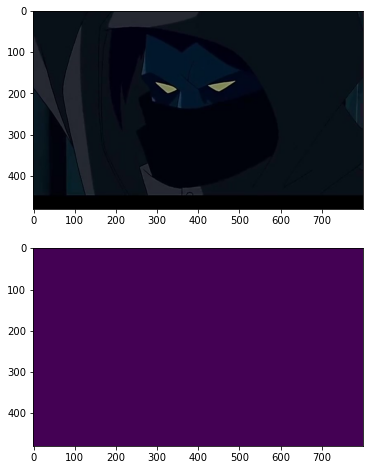

In [59]:
randIdx = np.random.randint(len(k))
print(randIdx)
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[randIdx])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

(504, 896, 3)
0 / 189
47 / 189
94 / 189
141 / 189
188 / 189


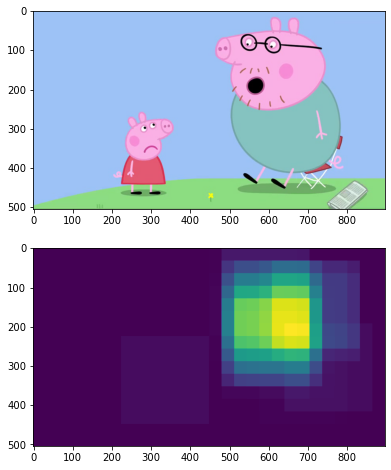

In [264]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[11232])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

(480, 848, 3)
0 / 160
40 / 160
80 / 160
120 / 160


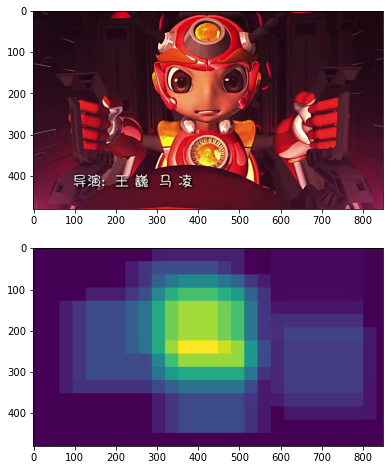

In [270]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[33392])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

In [7]:
print(k[11232])

personai_icartoonface_dettrain_22378.jpg


In [129]:
import pickle

with open('tmprects.pkl', 'rb') as pfile:
    rects, rects_conf = pickle.load(pfile)

563


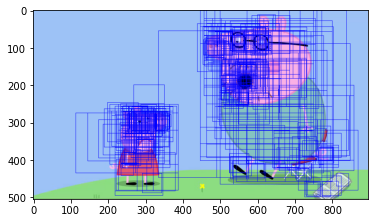

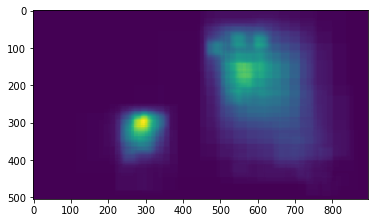

In [143]:
import matplotlib.pyplot as plt
import cv2

print(len(rects_conf))

img = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[11232])
hmap = np.zeros(img.shape[:2])
for i in range(len(rects)):
    currRect = np.int32(rects[i,:])
    img = cv2.rectangle(img, (currRect[0], currRect[1]), (currRect[0] + currRect[2], currRect[1] + currRect[3]), (0, 0, 255))
    hmap[currRect[1] : currRect[1] + currRect[3], currRect[0] : currRect[0] + currRect[2]] += rects_conf[i]

plt.imshow(img)
plt.show()
plt.imshow(hmap)
plt.show()

In [154]:
import importlib
import util
importlib.reload(util)

overlap_threshold = 0.1

def NMS_Max(rects, rects_conf):
    final_rects = []
    final_confs = []
    idxs = np.argsort(rects_conf)
    for i in range(len(rects)):
        # curr rect
        idx_i = idxs[i]
        include = True
        for j in range(i+1, len(rects)):
            # comparison rect
            idx_j = idxs[j]
            if util.IoU(rects[idx_i], rects[idx_j]) > overlap_threshold:
                include = False
                break
        if include:
            final_rects.append(rects[idx_i])
            final_confs.append(rects_conf[idx_i])

    return np.array(final_rects), np.array(final_confs)

def Soft_NMS(rects, rects_conf):
    rects_conf = rects_conf.copy()
    final_rects = []
    final_confs = []
    idxs = np.argsort(rects_conf)
    for i in range(len(rects)):
        # curr rect (low score)
        idx_i = idxs[i]
        for j in range(i+1, len(rects)):
            # comparison rect
            idx_j = idxs[j]
            if util.IoU(rects[idx_i], rects[idx_j]) > overlap_threshold:
                rects_conf[idx_i] = rects_conf[idx_i] * (1 - util.IoU(rects[idx_i], rects[idx_j]))

        final_rects.append(rects[idx_i])
        final_confs.append(rects_conf[idx_i])

    return np.array(final_rects), np.array(final_confs)

[0.21062629 0.29021102 0.31644267 0.54126352 0.84177756 0.88483834
 0.90819848 0.98636812 1.         1.         1.         1.
 1.         1.        ]


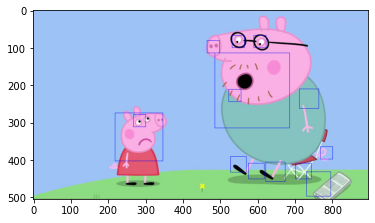

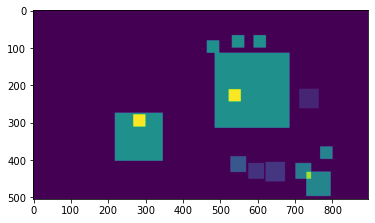

In [155]:
out_rects, out_confs = NMS_Max(rects, rects_conf)
print(out_confs)

img = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[11232])
hmap = np.zeros(img.shape[:2])
for i in range(len(out_rects)):
    currRect = np.int32(out_rects[i,:])
    img = cv2.rectangle(img, (currRect[0], currRect[1]), (currRect[0] + currRect[2], currRect[1] + currRect[3]), (0, 0, 255))
    hmap[currRect[1] : currRect[1] + currRect[3], currRect[0] : currRect[0] + currRect[2]] += out_confs[i]

plt.imshow(img)
plt.show()
plt.imshow(hmap)
plt.show()

[0.54126352 0.84177756 0.88483834 0.90819848 0.98636812 0.73521906
 0.89511748 0.66295359 0.72026075 1.         1.         1.
 0.53470403 1.         1.         1.        ]


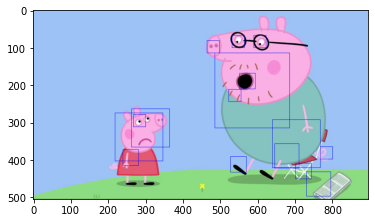

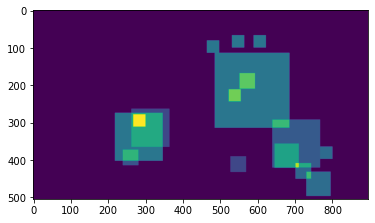

In [156]:
out_rects, out_conf = Soft_NMS(rects, rects_conf)
idxs = out_conf > 0.5

out_rects = out_rects[idxs]
out_conf = out_conf[idxs]
print(out_conf)

img = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[11232])
hmap = np.zeros(img.shape[:2])
for i in range(len(out_rects)):
    currRect = np.int32(out_rects[i,:])
    img = cv2.rectangle(img, (currRect[0], currRect[1]), (currRect[0] + currRect[2], currRect[1] + currRect[3]), (0, 0, 255))
    hmap[currRect[1] : currRect[1] + currRect[3], currRect[0] : currRect[0] + currRect[2]] += out_conf[i]

plt.imshow(img)
plt.show()
plt.imshow(hmap)
plt.show()


In [61]:
from so_evaluate import SoVisionImg
# do more pre-NMS analysis
with open('so_ourmodel_tests.pkl', 'rb') as pfile:
    imgs = pickle.load(pfile)

(1, 163, 0)


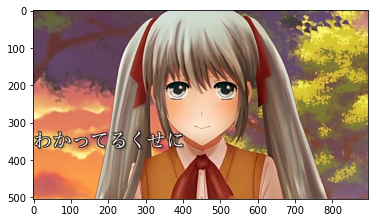

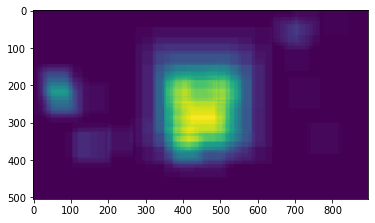

In [230]:
img = imgs[17]
print(img.compute_metrics())
hmap = np.zeros(img.get_img().shape[:2])
for bbidx in range(len(img.pred_bboxes)):
    bbox = img.pred_bboxes[bbidx]
    conf = img.pred_conf[bbidx]
    hmap[bbox[1] : bbox[1] + bbox[3], bbox[0] : bbox[0] + bbox[2]] += conf

plt.imshow(img.get_img())
plt.show()
plt.imshow(hmap)
plt.show()

0.0 47.001100248760665


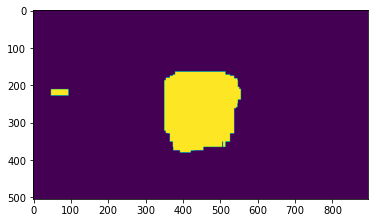

In [231]:
print(np.min(hmap), np.max(hmap))
binary_hmap = hmap > np.max(hmap) / 2
plt.imshow(binary_hmap)

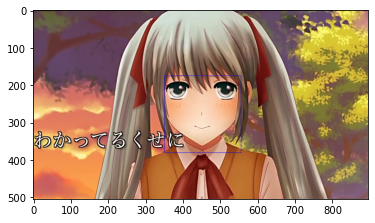

In [232]:
scores = np.zeros(len(img.pred_bboxes))
for bbidx in range(len(img.pred_bboxes)):
    bbox = img.pred_bboxes[bbidx]
    conf = img.pred_conf[bbidx]
    patch = binary_hmap[bbox[1] : bbox[1] + bbox[3], bbox[0] : bbox[0] + bbox[2]]
    scores[bbidx] = np.sum(patch) + 0.5 * np.sum(patch - 1)

order = np.argsort(scores)
newImg = SoVisionImg(img.path, [])
newImg.add_pred(img.pred_bboxes[order[-1]], img.pred_conf[order[-1]])
newImg.draw()